Try and find two catgeories that can be combined.

In [1]:
from pathlib import Path
# Load the softmax encodings of the data

from sisap2023.utils.mirflickr import load_encodings

smData = load_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings


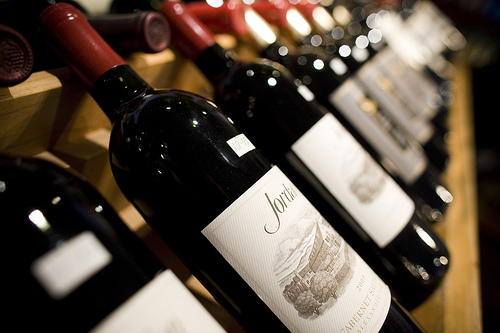

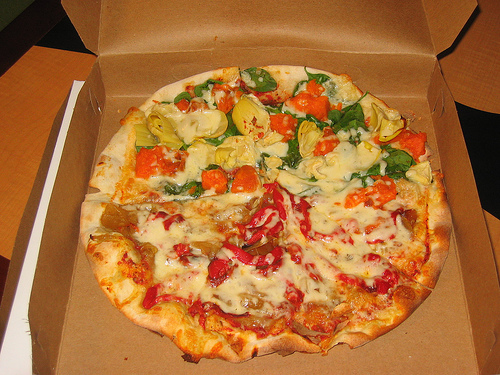

In [3]:
from sisap2023.utils.count_cats import get_best_cat_index
from sisap2023.utils.mirflickr import get_mf_image


cat1 = 907 # wine bottle
cat2 = 963 # pizza

# get a wine bottle and a pizza

indexes_for_cat1 = get_best_cat_index(cat1,smData)
indexes_for_cat2 = get_best_cat_index(cat2,smData)

display(get_mf_image(indexes_for_cat1[0]))
display(get_mf_image(indexes_for_cat2[0]))

In [4]:
from sisap2023.metrics.msed import msed
import numpy as np

poly_query_data = np.vstack((allData[indexes_for_cat1],allData[indexes_for_cat2]))


In [5]:
data_size = allData.shape[0]
msed_results = np.zeros(data_size)

nn_at_which_k = 100

for j in range(data_size):  # all the rows in the dataset
    data_for_j = np.vstack( (poly_query_data, allData[j]) )  # add a row
    msed_results[j] = msed(data_for_j)

closest_indices = np.argsort(msed_results)                      # in distance order
best_k_for_poly_indices = closest_indices[0:nn_at_which_k]

/Users/al/repos/sisap2023/sisap2023/metrics/msed.py:21: RuntimeWarning: divide by zero encountered in log
  logs = np.log(X)                        # logs of shape no_datapoints,features
/Users/al/repos/sisap2023/sisap2023/metrics/msed.py:24: RuntimeWarning: invalid value encountered in multiply
  hs = np.multiply(X,logs)                    # hs of shape no_datapoints,features
/Users/al/repos/sisap2023/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


KeyboardInterrupt: 

In [ ]:
from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_k_for_poly_indices,10,10,50,50)

